In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from nature import *

In [2]:

def get_fn(fold):
    return f'./continents/f{fold}.csv'

def get_conf_mat(fn):
    conf_mat = pd.read_csv(fn,header=None)
    conf_mat = np.array(conf_mat)
    return conf_mat

def get_accuracy(conf_mat):
    return np.sum(np.diag(conf_mat)) / np.sum(conf_mat)

def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100

def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

def plot_confusion_matrix(conf_mat, labels):
    plt.figure(figsize=figsize)
    # Create annotation array: show value if nonzero, else empty string
    conf_mat = np.round(conf_mat).astype(int)
    annot = np.where(conf_mat != 0, conf_mat.astype(str), "")
    sns.heatmap(conf_mat, annot=annot, cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, fmt='', annot_kws={"size": fontsize})
    # plt.title('Confusion Matrix')
    plt.xlabel('Expected')
    plt.ylabel('Predicted')
    plt.xticks()
    plt.yticks()
    plt.tight_layout()
    plt.savefig('continents_confusion_matrix.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

def plot_bubble_matrix(conf_mat, labels):
    # use bubble size to represent the value
    plt.figure(figsize=(4, 4))
    # Set up the plot
    n_classes = conf_mat.shape[0]
    x, y = np.meshgrid(np.arange(n_classes), np.arange(n_classes))
    # Scale bubble sizes - multiply by some factor to make bubbles visible but not overlapping
    sizes = conf_mat * 12  # Adjust multiplier as needed
    plt.scatter(x.flatten(), y.flatten(), s=sizes.flatten(), alpha=.8, c='black', edgecolors='white')
    plt.xlabel('Expected', fontsize=20)
    plt.ylabel('Predicted', fontsize=20)    
    # Set integer ticks
    ticks = np.arange(0,n_classes)
    # tick_labels = [f'{i}' for i in ticks]
    plt.xticks(ticks, labels, fontsize=16, rotation=90)
    plt.yticks(ticks, labels, fontsize=16)
    
    # # Add text annotations to show the values
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, f"{conf_mat[i, j]:.0f}", ha='center', va='center', color='white', fontsize=12) if conf_mat[i, j] > 20 else None
    
    # Add gridlines to make it easier to read
    plt.grid(True, linestyle='--', alpha=0.1)
    
    # expand the xlim and ylim so that the bubbles are not cut off
    plt.xlim(-1, n_classes)
    plt.ylim(-1, n_classes)
    plt.show()
    plt.close()
    


In [3]:
continent2int = {
    'AFR': '0',
    'AMR': '1',
    'EAS': '2',
    'EUR': '3',
    'SAS': '4',
}

labels = list(continent2int.keys())
print(labels)

['AFR', 'AMR', 'EAS', 'EUR', 'SAS']


fold: 0
[[ 99.4   0.    0.    0.    0. ]
 [  0.6 100.    0.    0.    0. ]
 [  0.    0.  100.    0.    0. ]
 [  0.    0.    0.  100.    0. ]
 [  0.    0.    0.    0.  100. ]]
fold: 1
[[ 99.4   0.    0.    0.    0. ]
 [  0.6 100.    0.    0.    0. ]
 [  0.    0.  100.    0.    0. ]
 [  0.    0.    0.  100.    0. ]
 [  0.    0.    0.    0.  100. ]]
fold: 2
[[100.   0.   0.   0.   0.]
 [  0.  99.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   1.   0. 100.   0.]
 [  0.   0.   0.   0. 100.]]
fold: 3
[[100.   0.   0.   0.   0.]
 [  0.  98.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   2.   0. 100.   0.]
 [  0.   0.   0.   0. 100.]]
fold: 4
[[ 99.4   0.    0.    0.    0. ]
 [  0.6  99.    0.    0.    0. ]
 [  0.    0.  100.    0.    0. ]
 [  0.    1.    0.  100.    0. ]
 [  0.    0.    0.    0.  100. ]]
fold: 5
[[ 99.4   0.    0.    0.    0. ]
 [  0.6  99.    0.    0.    0. ]
 [  0.    0.  100.    0.    0. ]
 [  0.    1.    0.  100.    0. ]
 [  0.    0.    0.    0.  100. ]]
fold: 

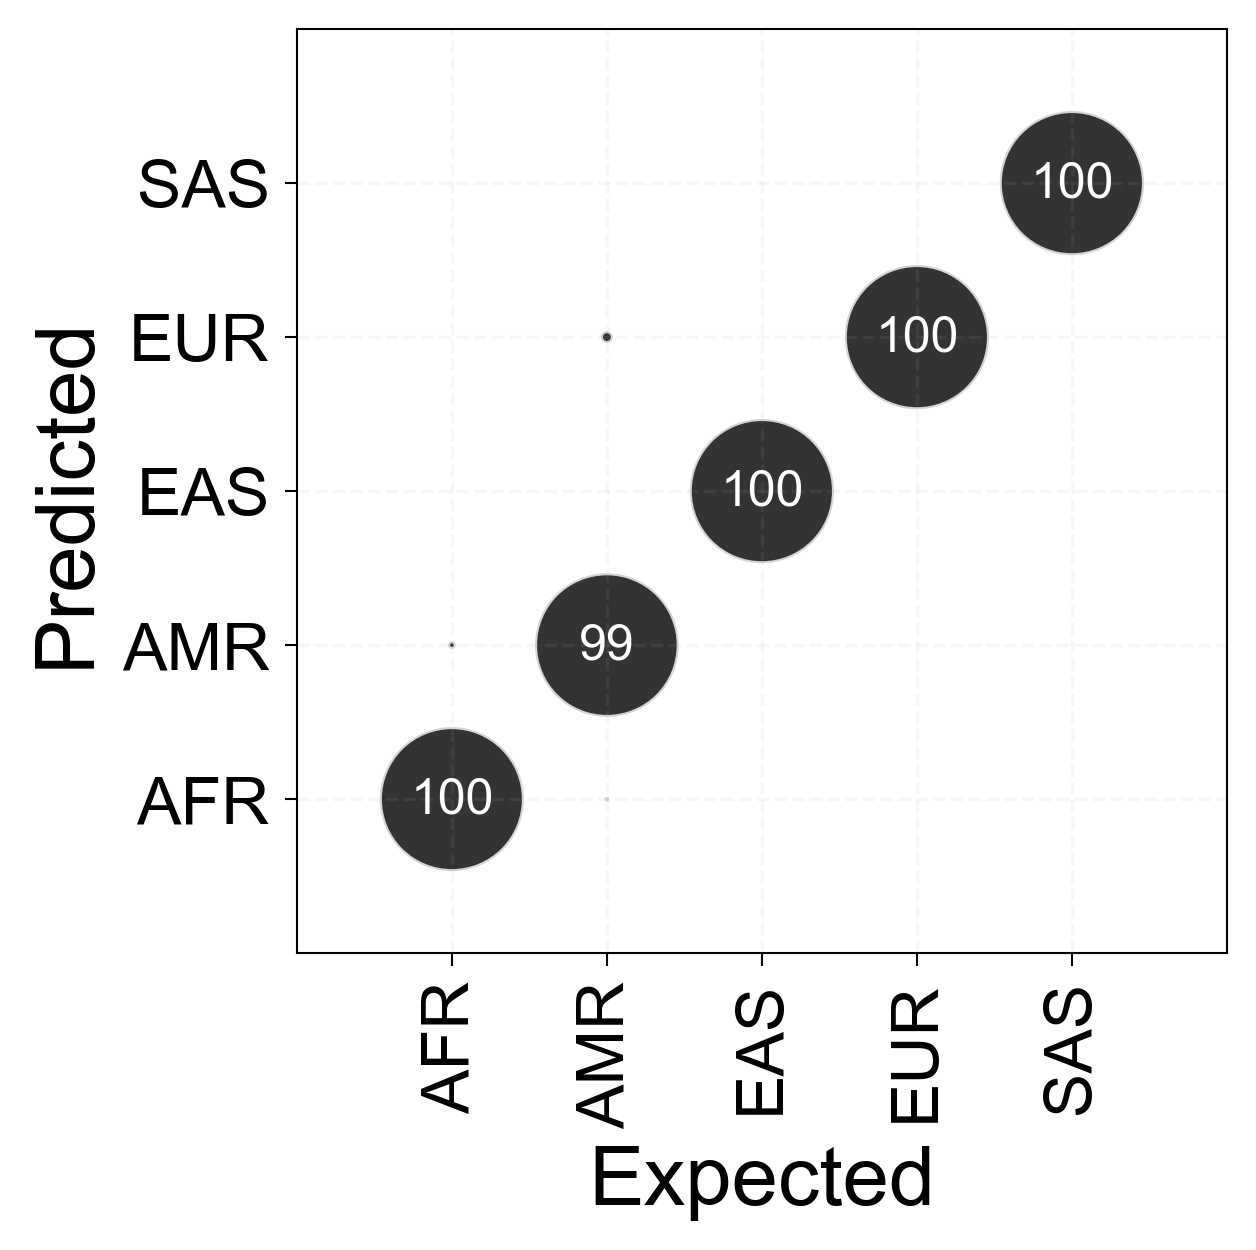

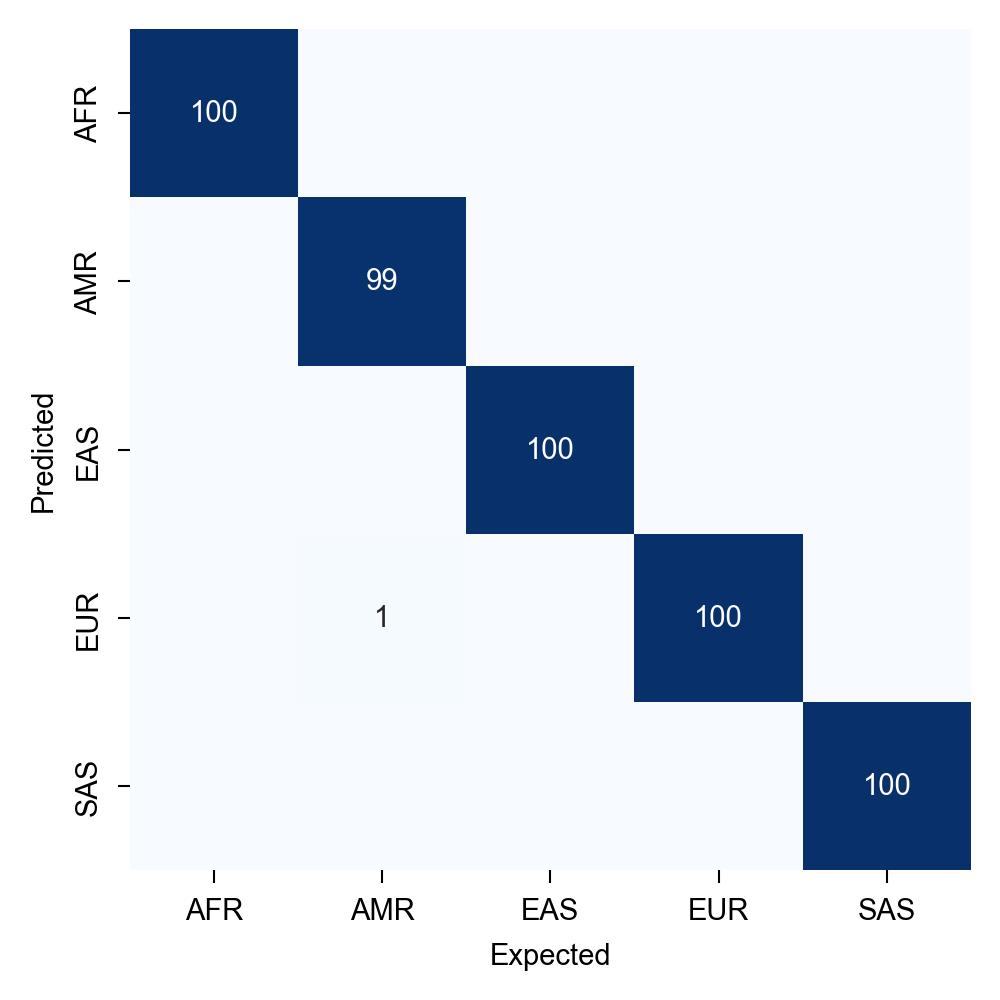

AFR 100
AMR 99
EAS 100
EUR 100
SAS 100
Overall F1 score: 99.8


In [4]:
conf_mats = []
for fold in range(10):
    fn = get_fn(fold)
    conf_mat = get_conf_mat(fn)
    print(f'fold: {fold}')
    print(conf_mat)
    conf_mats.append(conf_mat)

# average the conf_mats
conf_mat = np.mean(conf_mats, axis=0)

# plot the conf_mat
plot_bubble_matrix(conf_mat, labels)
plot_confusion_matrix(conf_mat, labels)

f1 = get_F1_score(conf_mat)
# remove nan
f1 = [i for i in f1 if not np.isnan(i)]
[print(i,f'{j:.0f}') for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1:.1f}')